## **Weather Data Analysis and Forecast Using SARIMA & SARIMAX Model**

In [355]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [356]:
!pip install semopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import warnings;
warnings.simplefilter('ignore')

# **Preparing Data**

In [358]:
df1 = pd.read_csv('96745099999.csv')
df2 = pd.read_csv('96745099999 (1).csv')
df3 = pd.read_csv('96745099999 (2).csv')
df4 = pd.read_csv('96745099999 (3).csv')
df5 = pd.read_csv('96745099999 (4).csv')
df6 = pd.read_csv('96745099999 (5).csv')
df7 = pd.read_csv('96745099999 (6).csv')
df8 = pd.read_csv('96745099999 (7).csv')
df9 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True) #gantinya append
#merging datas
df9.columns

Index(['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'TEMP',
       'TEMP_ATTRIBUTES', 'DEWP', 'DEWP_ATTRIBUTES', 'SLP', 'SLP_ATTRIBUTES',
       'STP', 'STP_ATTRIBUTES', 'VISIB', 'VISIB_ATTRIBUTES', 'WDSP',
       'WDSP_ATTRIBUTES', 'MXSPD', 'GUST', 'MAX', 'MAX_ATTRIBUTES', 'MIN',
       'MIN_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNDP', 'FRSHTT'],
      dtype='object')

In [359]:
print('source: NOAA')

source: NOAA


In [360]:
df10 = df9[['DATE', 'NAME','PRCP', 'TEMP']] #just use this column
df10.head() 

,DATE,NAME,PRCP,TEMP
0,2015-01-01,"JAKARTA OBSERVATORY, ID",0.28,79.5
1,2015-01-02,"JAKARTA OBSERVATORY, ID",1.18,79.6
2,2015-01-03,"JAKARTA OBSERVATORY, ID",0.35,78.8
3,2015-01-04,"JAKARTA OBSERVATORY, ID",0.08,78.4
4,2015-01-05,"JAKARTA OBSERVATORY, ID",0.00,82.4


In [361]:
df10['temp(c)'] = (df10['TEMP'] - 32)*5/9 #changing to celcius
df10['prcp'] = df10['PRCP']*25.4 #changing to mm
df10.head()

,DATE,NAME,PRCP,TEMP,temp(c),prcp
0,2015-01-01,"JAKARTA OBSERVATORY, ID",0.28,79.5,26.388889,7.112
1,2015-01-02,"JAKARTA OBSERVATORY, ID",1.18,79.6,26.444444,29.972
2,2015-01-03,"JAKARTA OBSERVATORY, ID",0.35,78.8,26.000000,8.890
3,2015-01-04,"JAKARTA OBSERVATORY, ID",0.08,78.4,25.777778,2.032
4,2015-01-05,"JAKARTA OBSERVATORY, ID",0.00,82.4,28.000000,0.000


In [362]:
df10['month'] = df10['DATE'].str.slice(0,7) #making new column 'bulan'
df10.head()

,DATE,NAME,PRCP,TEMP,temp(c),prcp,month
0,2015-01-01,"JAKARTA OBSERVATORY, ID",0.28,79.5,26.388889,7.112,2015-01
1,2015-01-02,"JAKARTA OBSERVATORY, ID",1.18,79.6,26.444444,29.972,2015-01
2,2015-01-03,"JAKARTA OBSERVATORY, ID",0.35,78.8,26.000000,8.890,2015-01
3,2015-01-04,"JAKARTA OBSERVATORY, ID",0.08,78.4,25.777778,2.032,2015-01
4,2015-01-05,"JAKARTA OBSERVATORY, ID",0.00,82.4,28.000000,0.000,2015-01


In [363]:
df10.isna().sum()

DATE       0
NAME       0
PRCP       0
TEMP       0
temp(c)    0
prcp       0
month      0
dtype: int64

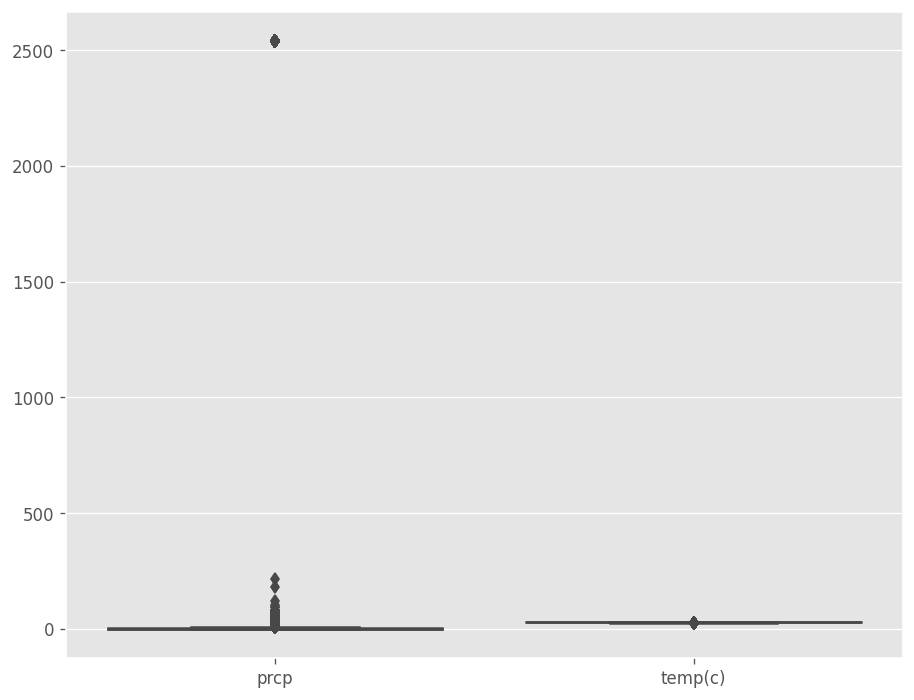

In [364]:
ax = sns.boxplot(data = df10[['prcp', 'temp(c)']])

**Handling Outlier**

In [365]:
#making function to replace outlier
def outlier (x):
    sorted(x)
    q1, q3 = x.quantile([0.25, 0.75])
    IQR = q3 - q1
    lwr_bound = q1 - (1.5*IQR)
    upr_bound = q3 + (1.5*IQR)
    return lwr_bound, upr_bound

In [366]:
low, high = outlier(df10['prcp'])
low2, high2 = outlier(df10['temp(c)'])

In [367]:
#replacing outlier with upper bound and lower bound value
df10['prcp'] = np.where(df10['prcp']>high, high, df10['prcp'])
df10['prcp'] = np.where(df10['prcp']<low, low, df10['prcp'])

df10['temp(c)'] = np.where(df10['temp(c)']>high2, high2, df10['temp(c)'])
df10['temp(c)'] = np.where(df10['temp(c)']<low2, low2, df10['temp(c)'])

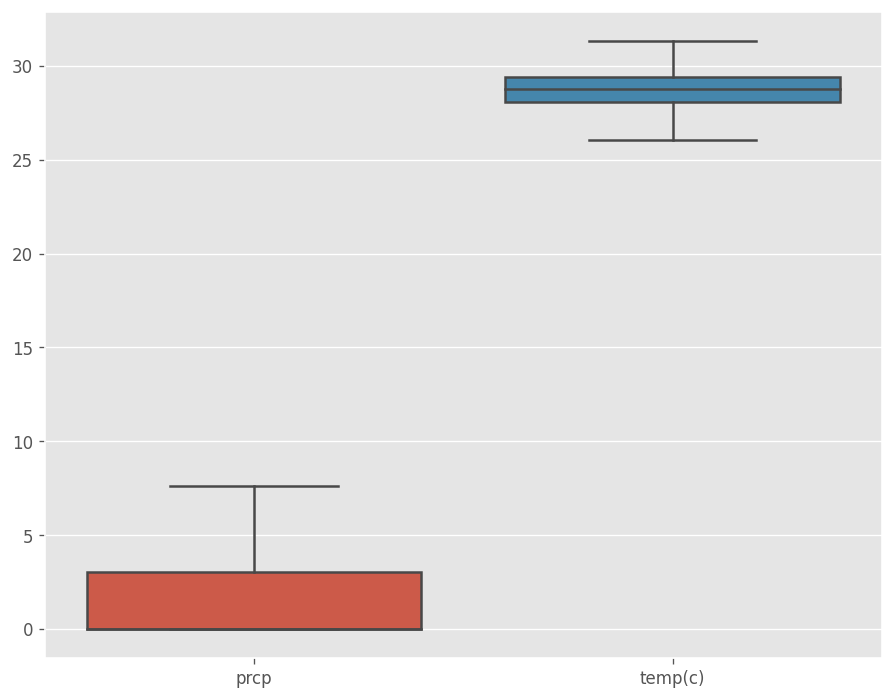

In [368]:
ax = sns.boxplot(data = df10[['prcp','temp(c)']])

In [369]:
df10_1 = df10[['DATE', 'NAME', 'prcp', 'temp(c)', 'month']]

# **Correlation**

In [370]:
# Convert dataframe into series
list1 = df10_1['temp(c)']
list2 = df10_1['prcp']
 
# Apply the pearsonr()
nett = 0
corr, _ = pearsonr(list1, list2)

print('Pearsons correlation: %.3f' % corr)
if corr < 0:
    print('have opposite corellation')
if corr > 0:
    print('have linear corellation')
if corr == 0:
    print('have no corellation')
else:
    print('')

Pearsons correlation: -0.507
have opposite corellation



In [371]:
#correlation table
df10_1.corr()

,prcp,temp(c)
prcp,1.000000,-0.507244
temp(c),-0.507244,1.000000


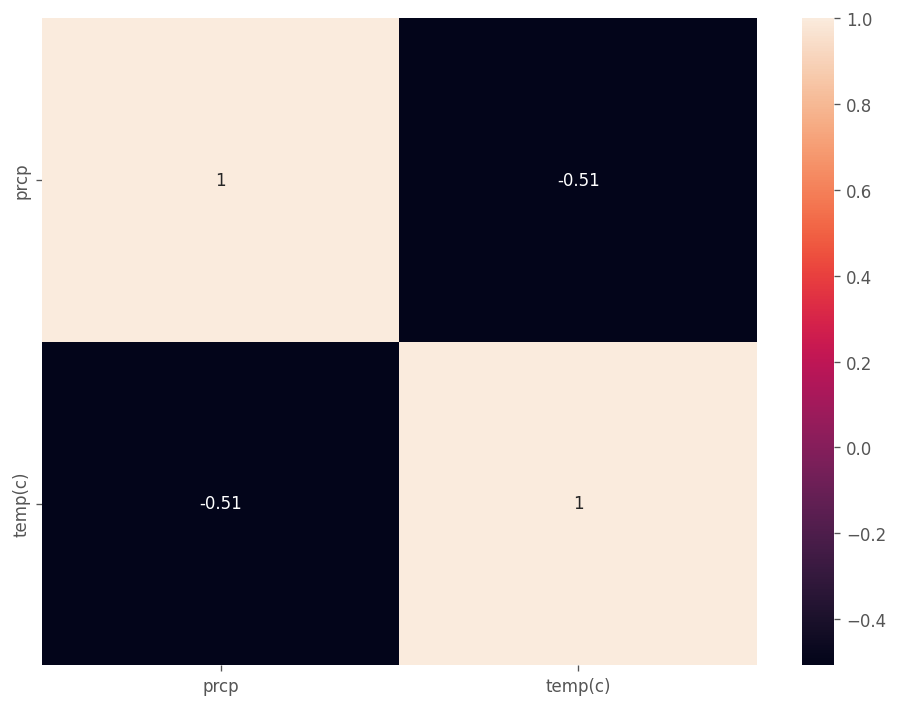

In [372]:
#correlation heatmap
plt.figure(figsize=(8,6))
#sns.set_theme('notebook', style='white')
plt.style.use('ggplot')
sns.heatmap(df10_1.corr(), annot=True, fmt='.2g')
plt.tight_layout()
plt.show()

# **Data Visualization**

In [373]:
df11 = df10.groupby('month')['prcp', 'temp(c)'].agg({'prcp': 'sum', 'temp(c)':'mean'}).reset_index()
df11['month'].astype('datetime64[M]')
df11

,month,prcp,temp(c)
0,2015-01,97.028,27.198925
1,2015-02,118.618,27.055556
2,2015-03,93.218,27.850000
3,2015-04,55.880,28.640741
4,2015-05,21.336,29.367384
...,...,...,...
91,2022-08,25.400,29.195341
92,2022-09,39.116,28.811111
93,2022-10,79.756,28.401852
94,2022-11,67.564,28.381481


In [374]:
from matplotlib import style #I just want to know the available style, hehe.
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0, 0.5, 'Precitipation (mm)')

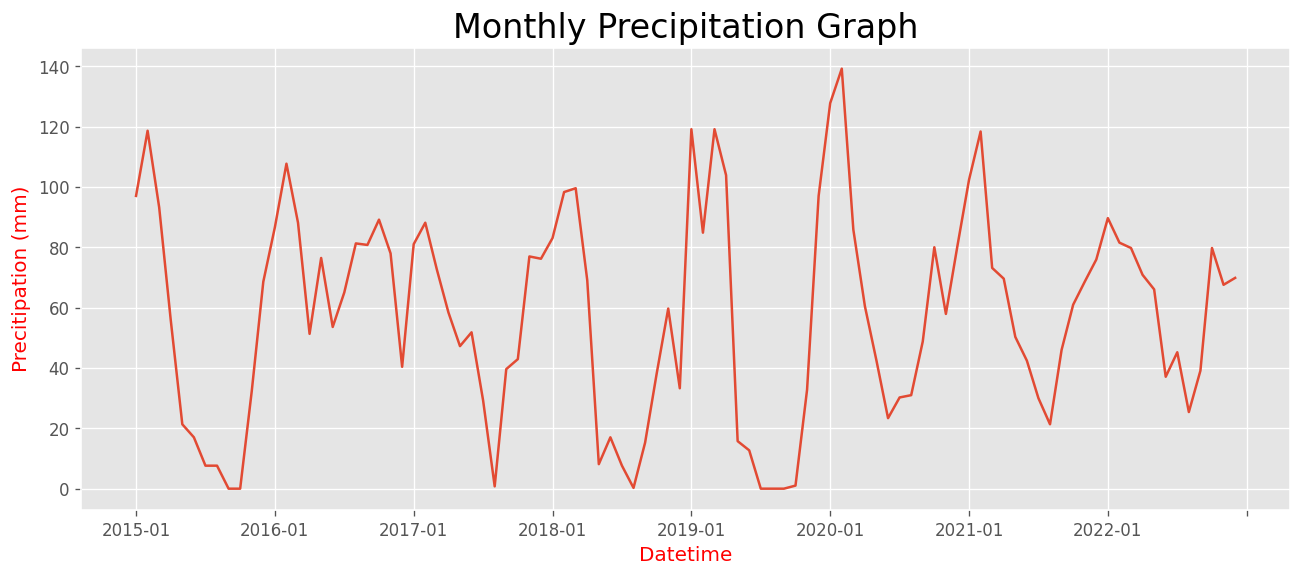

In [375]:
#ine chart example
import matplotlib.ticker as plticker

plt.figure(figsize= (13,5))
plt.style.use('ggplot')
plt.plot(df11['month'], df11['prcp'], linewidth=1.5)
plt.title('Monthly Precipitation Graph', fontsize = 20)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(12)) #mengubah interval xticks to 2 years interval
plt.xlabel('Datetime', color = 'r')
plt.ylabel('Precitipation (mm)', color = 'r')

Text(0, 0.5, 'Temperature (Celcius)')

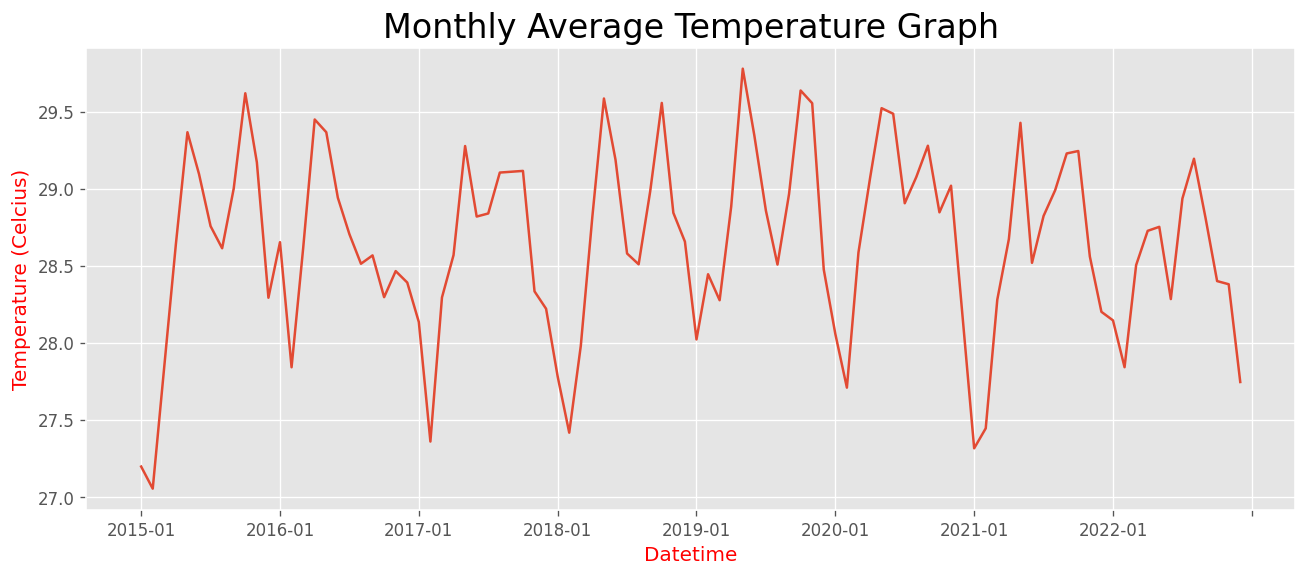

In [376]:
#linechart example
plt.figure(figsize= (13,5))
plt.style.use('ggplot')
plt.plot(df11['month'], df11['temp(c)'], linewidth=1.5)
plt.title('Monthly Average Temperature Graph', fontsize = 20)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(12)) #mengubah interval xticks to 2 years interval
plt.xlabel('Datetime', color = 'r')
plt.ylabel('Temperature (Celcius)', color = 'r')

# **Forecasting Precipitation (SARIMA)**

In [377]:
df10_1['month'] = df10_1['DATE'].str.slice(0,7)
df10.head()

,DATE,NAME,PRCP,TEMP,temp(c),prcp,month
0,2015-01-01,"JAKARTA OBSERVATORY, ID",0.28,79.5,26.388889,7.112,2015-01
1,2015-01-02,"JAKARTA OBSERVATORY, ID",1.18,79.6,26.444444,7.620,2015-01
2,2015-01-03,"JAKARTA OBSERVATORY, ID",0.35,78.8,26.055556,7.620,2015-01
3,2015-01-04,"JAKARTA OBSERVATORY, ID",0.08,78.4,26.055556,2.032,2015-01
4,2015-01-05,"JAKARTA OBSERVATORY, ID",0.00,82.4,28.000000,0.000,2015-01


In [378]:
from statsmodels.tsa.seasonal import seasonal_decompose
df10_1['DATE'] = pd.to_datetime(df10_1['DATE'])
df10_1.dtypes

DATE       datetime64[ns]
NAME               object
prcp              float64
temp(c)           float64
month              object
dtype: object

In [379]:
df11 = df10_1.groupby('month')['prcp', 'temp(c)'].agg({'prcp': 'sum', 'temp(c)':'mean'}).reset_index()
df11

,month,prcp,temp(c)
0,2015-01,97.028,27.198925
1,2015-02,118.618,27.055556
2,2015-03,93.218,27.850000
3,2015-04,55.880,28.640741
4,2015-05,21.336,29.367384
...,...,...,...
91,2022-08,25.400,29.195341
92,2022-09,39.116,28.811111
93,2022-10,79.756,28.401852
94,2022-11,67.564,28.381481


In [380]:
df11.set_index('month', inplace=True)

In [381]:
df11.index.freq = 'MS'
df11

,prcp,temp(c)
month,,
2015-01,97.028,27.198925
2015-02,118.618,27.055556
2015-03,93.218,27.850000
2015-04,55.880,28.640741
2015-05,21.336,29.367384
...,...,...
2022-08,25.400,29.195341
2022-09,39.116,28.811111
2022-10,79.756,28.401852


<Axes: xlabel='month'>

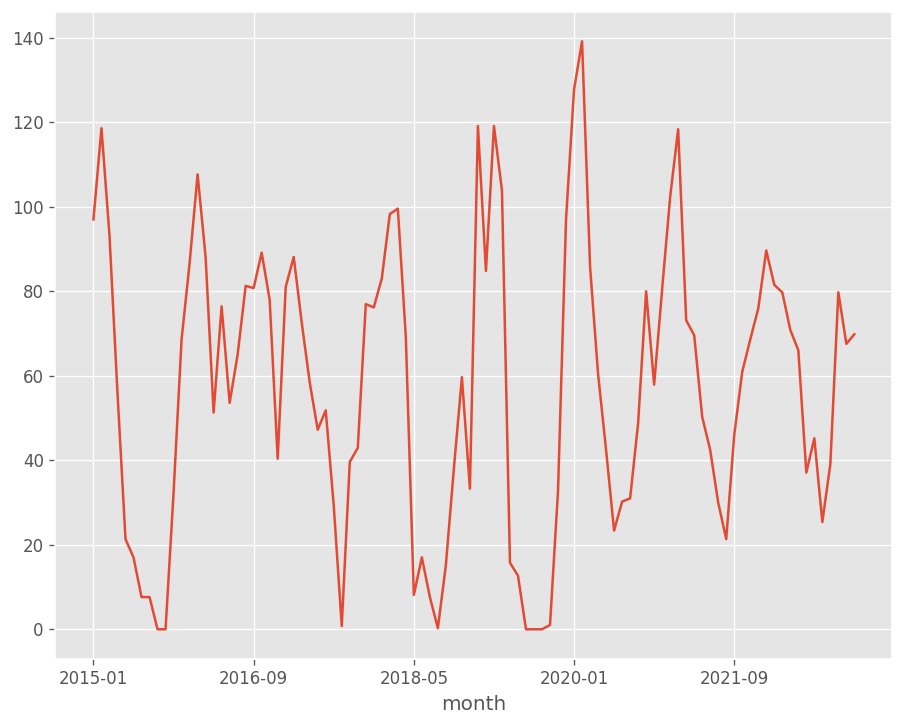

In [382]:
import matplotlib.pyplot as plt
df11['prcp'].plot()

**Train data before predicting**

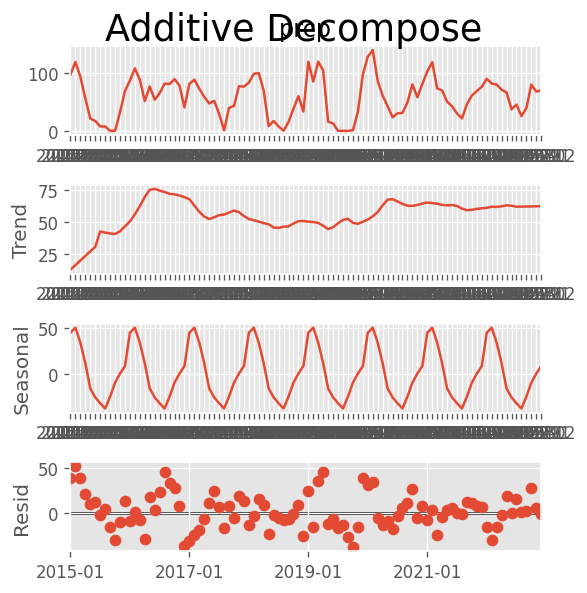

In [383]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add = seasonal_decompose(x=df11['prcp'], model='additive', extrapolate_trend='freq', period=12)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(24))
plt.show()

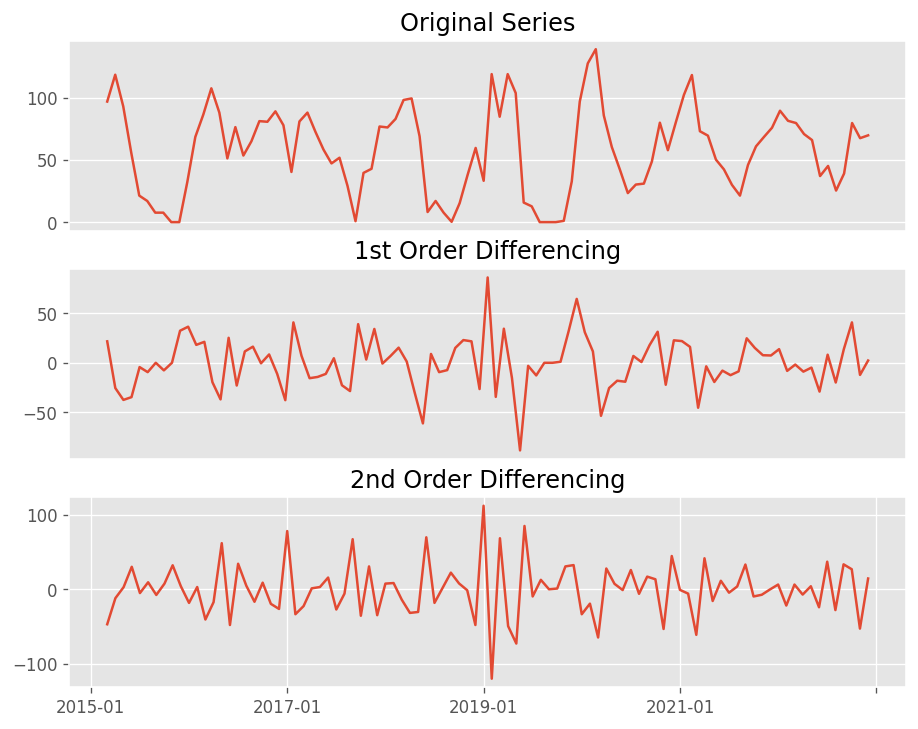

In [384]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(df11['prcp']); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(df11['prcp'].diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(df11['prcp'].diff().diff()); ax3.set_title('2nd Order Differencing')
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(24))
plt.show()

In [385]:
#stationer or not
from statsmodels.tsa.stattools import adfuller
result = adfuller(df11['prcp'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.549938
p-value: 0.000000
Critical Values:
	1%: -3.505
	5%: -2.894
	10%: -2.584


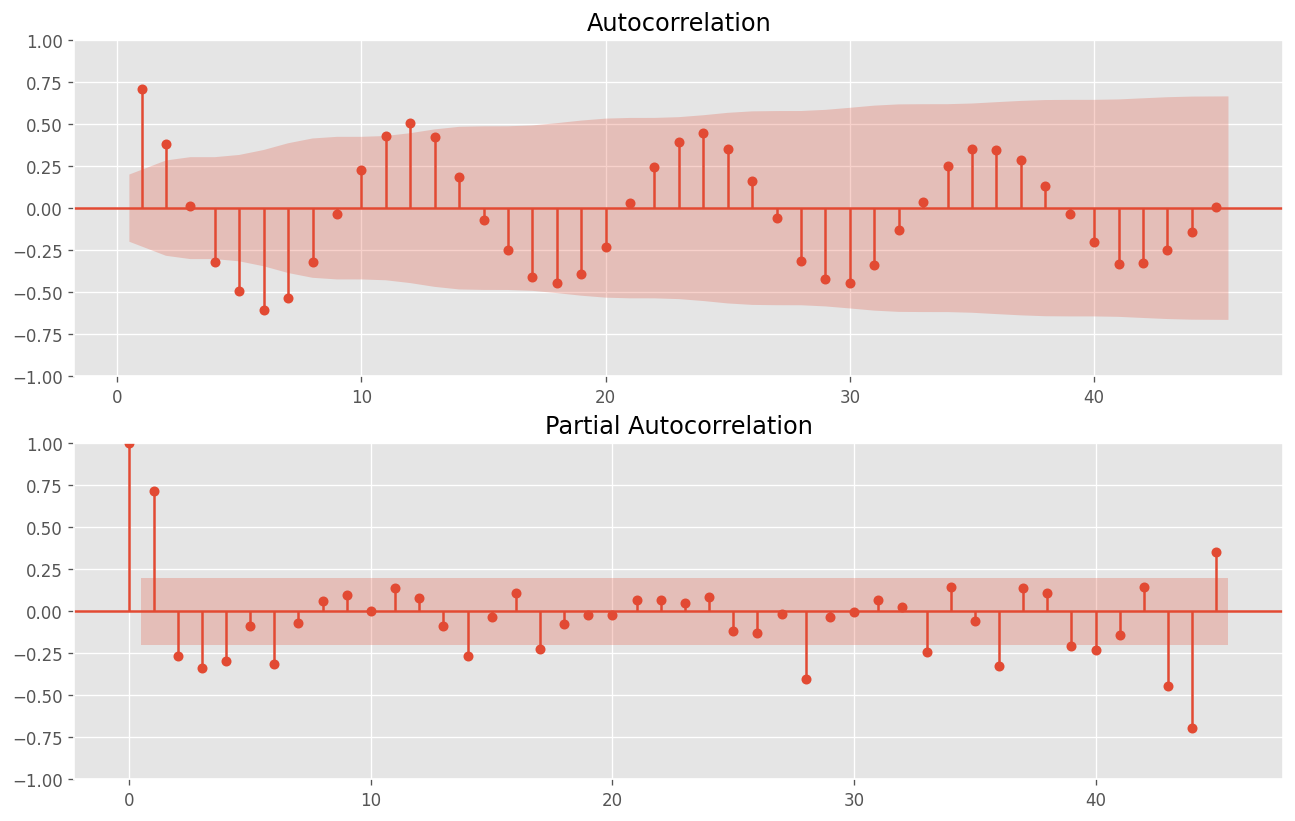

In [386]:
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

def acf_pacf(df11,alags=48,plags=48):
    ''' 
        Performs acf/pacf results plot      
                             
        df          Dataframe to Analyse     
    '''

    #Create figure
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(13,8))
    #Make ACF plot
    plot_acf(df11['prcp'],lags=alags, zero=False,ax=ax1)
    #Make PACF plot
    plot_pacf(df11['prcp'],lags=plags, ax=ax2)
    plt.show()

acf_pacf(df11,alags=45,plags=45)

In [387]:
#setting sarima

def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [388]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from tqdm import tqdm_notebook
#simulasi mencari model sarimax terbaik

p = range(0, 3, 1)
d = 0
q = range(0, 3, 1)
P = range(0, 3, 1)
D = 0
Q = range(0, 3, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

result_df = optimize_SARIMA(parameters_list, 1, 1, 2, df11['prcp'])
result_df

81


  0%|          | 0/81 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(2, 1, 0, 2)",874.496867
1,"(0, 0, 2, 2)",874.698090
2,"(0, 0, 2, 1)",879.904046
3,"(0, 1, 2, 1)",881.818926
4,"(1, 0, 2, 1)",881.830729
5,"(0, 2, 2, 0)",881.912508
6,"(0, 0, 0, 1)",883.079143
7,"(0, 0, 0, 2)",883.489846
8,"(1, 1, 2, 1)",883.808170
9,"(1, 2, 2, 0)",883.832787


partial auto correlation (p) = 1

autocorrelation (q) = 1,2

periode (m) = 12

berapa kali data di diferensiasi (jika tidak stasioner)(d) = 0 (our data is already stationier)



In [389]:
from pmdarima import auto_arima
auto_arima(df11['prcp'], seasonal = True, m = 12).summary() #m refers to the number of periods in each season
#this is the best period i've use

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -430.563
Date:                              Tue, 11 Apr 2023   AIC                            871.127
Time:                                      00:04:28   BIC                            883.949
Sample:                                  01-01-2015   HQIC                           876.310
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3839      2.053      0.187      0.852      -3.639       4.407
ar.L1          0.5806      0.086      6.727      0.000       0.411       0.750
ar.S.L12       0.9844      0.084     11.772      0.000       0.820       1.148
ma.S.L12      -0.8634      0.357     -2.419      0.016      -1.563      -0.164
sigma2       408.6514    117.677      3.473      0.001     178.009     639.293
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.86   Prob(JB):                         0.81
Heteroskedasticity (H):               0.47   Skew:                             0.07
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [390]:
#perform data partitioning
n=len(df11)
n

96

In [391]:
start_index = n-12
start_index

84

In [392]:
train = df11.iloc[:-12]
test = df11.iloc[-12:]
test.head()

,prcp,temp(c)
month,,
2022-01,89.662,28.146953
2022-02,81.534,27.843254
2022-03,79.756,28.505376
2022-04,70.866,28.727778
2022-05,66.040,28.753704


In [393]:
len(test)

12

In [394]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['prcp'], order = (1, 0, 1), seasonal_order=(1, 0, 1, 12)) #this is the best period i've use
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               prcp   No. Observations:                   84
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -384.588
Date:                            Tue, 11 Apr 2023   AIC                            779.177
Time:                                    00:04:31   BIC                            791.331
Sample:                                01-01-2015   HQIC                           784.062
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7935      0.080      9.888      0.000       0.636       0.951
ma.L1         -0.1159      0.150     -0.775      0.438      -0.409       0.177
ar.S.L12       0.9989      0.050     19.902      0.000       0.901       1.097
ma.S.L12      -0.9523      1.082     -0.880      0.379      -3.072       1.168
sigma2       422.0939    425.396      0.992      0.321    -411.666    1255.854
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 2.89
Prob(Q):                              0.65   Prob(JB):                         0.24
Heteroskedasticity (H):               0.95   Skew:                            -0.03
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

if most of p value are below 0.5, its ok!

In [395]:
start = len(train)
end = len(train)+len(test)-1

predict = results.predict(start = start, end = end, dynamic = False, type='level')
predict.reset_index()

,index,predicted_mean
0,2022-01-01,101.594170
1,2022-02-01,106.122364
2,2022-03-01,88.219794
3,2022-04-01,66.076200
4,2022-05-01,38.513857
5,2022-06-01,31.922722
6,2022-07-01,25.016651
7,2022-08-01,20.915836
8,2022-09-01,31.678930
9,2022-10-01,41.780553


In [396]:
#compare prediction and expected value
# Load specific evaluation tools
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error as mae
import numpy as np
  
# Calculate root mean squared error
print(rmse(test["prcp"], predict))
print(mae(test["prcp"], predict))

""" Have tried many models, and this is the best model """

17.845050061258057
14.582485889489087


' Have tried many models, and this is the best model '

In [397]:
#MAPE
actual = test["prcp"]
pred = predict

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
print(mape(actual, pred))

23.182965250260015


decent forecasting ability :)

In [398]:
from datetime import datetime

dates = ['11-2019', '12-2019', '01-2020']
dates = [datetime.strptime(x, '%m-%Y') for x in dates]

In [399]:
test2 = test.reset_index()
"""
error happened before, so I reset it

"""

'\nerror happened before, so I reset it\n\n'

In [400]:
test2.columns

Index(['month', 'prcp', 'temp(c)'], dtype='object')

In [401]:
test2['month'] = test2['month'].astype('datetime64[M]')
test2

,month,prcp,temp(c)
0,2022-01-01,89.662,28.146953
1,2022-02-01,81.534,27.843254
2,2022-03-01,79.756,28.505376
3,2022-04-01,70.866,28.727778
4,2022-05-01,66.040,28.753704
5,2022-06-01,37.084,28.285185
6,2022-07-01,45.212,28.937276
7,2022-08-01,25.400,29.195341
8,2022-09-01,39.116,28.811111
9,2022-10-01,79.756,28.401852


In [402]:
test2.set_index('month', inplace=True)

In [403]:
test2.index.freq = 'MS'
test

,prcp,temp(c)
month,,
2022-01,89.662,28.146953
2022-02,81.534,27.843254
2022-03,79.756,28.505376
2022-04,70.866,28.727778
2022-05,66.040,28.753704
2022-06,37.084,28.285185
2022-07,45.212,28.937276
2022-08,25.400,29.195341
2022-09,39.116,28.811111


<Axes: xlabel='month'>

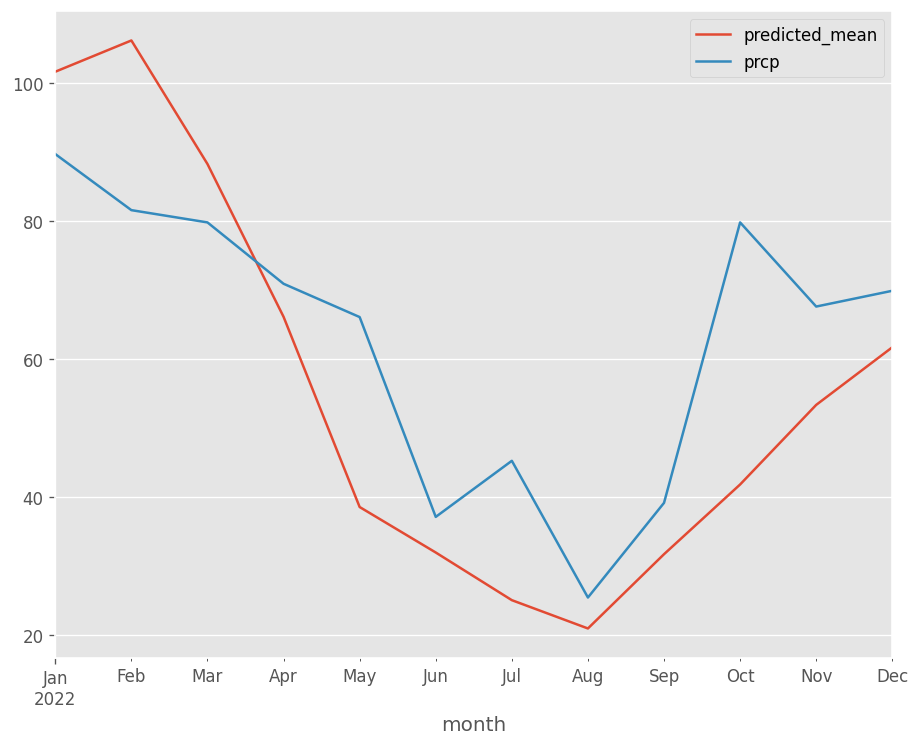

In [404]:
predict.plot(legend = True)
test2['prcp'].plot(legend = True)

**Predict data**

In [405]:
model = SARIMAX(df11['prcp'], order = (1, 0, 1), seasonal_order=(2, 0, 2, 12))
results2 = model.fit()
fore = results2.predict(len(df11), len(df11)+12, typ = 'levels').rename('SARIMAX forecast') #predict nest 2 years

In [406]:
fore

2023-01-01    101.237786
2023-02-01    102.907046
2023-03-01     87.994329
2023-04-01     68.850164
2023-05-01     38.186558
2023-06-01     32.050987
2023-07-01     22.509461
2023-08-01     15.210315
2023-09-01     26.991003
2023-10-01     35.695955
2023-11-01     52.201208
2023-12-01     67.997399
2024-01-01     89.894333
Freq: MS, Name: SARIMAX forecast, dtype: float64

In [407]:
df11 = df11.reset_index()

In [408]:
df11['month'] = pd.to_datetime(df11['month'])

Text(0, 0.5, 'Precitipation (mm)')

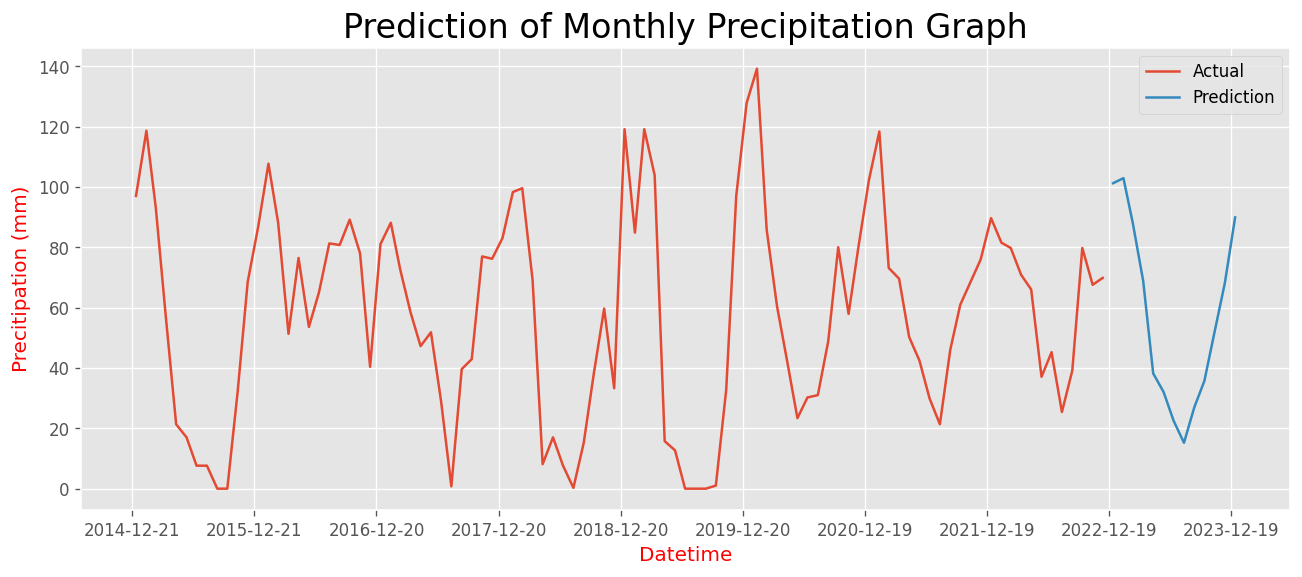

In [409]:
plt.figure(figsize= (13,5))
plt.style.use('ggplot')
plt.plot(df11['month'], df11['prcp'], linewidth=1.5, label='Actual')
plt.plot(fore, linewidth=1.5, label = 'Prediction')
plt.legend()
plt.title('Prediction of Monthly Precipitation Graph', fontsize = 20)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365)) #mengubah interval xticks to 1 year interval
plt.xlabel('Datetime', color = 'r')
plt.ylabel('Precitipation (mm)', color = 'r')

**This graph can't be 100% correct, yo!**

because there is another variable that can influence precipitation trends, like La Nina, El Nino, temperature, HARP, God's Decision, etc.
So, after this, I'll forecast with SARIMAX model.

RMSE = 17.8

# **Forecasting Precipitation (SARIMAX)**

**Train data**

In [410]:
from pmdarima import auto_arima
auto_arima(df11['prcp'], exog= train['temp(c)'], seasonal = True, m = 12).summary() #m refers to the number of periods in each season
#this is the best period i've use

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   96
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -430.563
Date:                              Tue, 11 Apr 2023   AIC                            871.127
Time:                                      00:04:51   BIC                            883.949
Sample:                                           0   HQIC                           876.310
                                               - 96                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3839      2.053      0.187      0.852      -3.639       4.407
ar.L1          0.5806      0.086      6.727      0.000       0.411       0.750
ar.S.L12       0.9844      0.084     11.772      0.000       0.820       1.148
ma.S.L12      -0.8634      0.357     -2.419      0.016      -1.563      -0.164
sigma2       408.6514    117.677      3.473      0.001     178.009     639.293
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.86   Prob(JB):                         0.81
Heteroskedasticity (H):               0.47   Skew:                             0.07
Prob(H) (two-sided):                  0.04   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [411]:
model2 = SARIMAX(train['prcp'], exog= train['temp(c)'], order = (1, 0, 1), seasonal_order=(1, 0, 1, 12))
results3 = model.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                    prcp   No. Observations:                   96
Model:             SARIMAX(1, 0, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -434.404
Date:                                 Tue, 11 Apr 2023   AIC                            882.808
Time:                                         00:04:52   BIC                            900.758
Sample:                                     01-01-2015   HQIC                           890.064
                                          - 12-01-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7843      0.108      7.234      0.000       0.572       0.997
ma.L1         -0.1244      0.141     -0.881      0.378      -0.401       0.152
ar.S.L12       0.0129      0.269      0.048      0.962      -0.515       0.541
ar.S.L24       0.9867      0.275      3.584      0.000       0.447       1.526
ma.S.L12      -0.0328      1.064     -0.031      0.975      -2.119       2.053
ma.S.L24      -0.9230      1.175     -0.786      0.432      -3.226       1.380
sigma2       357.8025    363.574      0.984      0.325    -354.789    1070.394
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 2.77
Prob(Q):                              0.69   Prob(JB):                         0.25
Heteroskedasticity (H):               0.61   Skew:                            -0.13
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [412]:
predict2 = results3.predict(start = start, end = end, dynamic = False, type='level')
predict2.reset_index()

,index,predicted_mean
0,2022-01-01,98.285420
1,2022-02-01,101.173993
2,2022-03-01,69.418552
3,2022-04-01,54.731803
4,2022-05-01,44.377712
5,2022-06-01,49.268403
6,2022-07-01,34.729438
7,2022-08-01,39.348710
8,2022-09-01,37.769539
9,2022-10-01,52.795197


In [413]:
#compare prediction and expected value
# Load specific evaluation tools
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error as mae
import numpy as np
  
# Calculate root mean squared error
print(rmse(test["prcp"], predict2))
print(mae(test["prcp"], predict2))

14.59715668501655
12.801338569135751


In [414]:
#MAE
from sklearn.metrics import mean_absolute_error as mae
print(mae(test["prcp"], predict2))

12.801338569135751


In [415]:
#MAPE
actual = test["prcp"]
pred = predict2

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
print(mape(actual, pred))

22.36686497734795


decent forecasting ability


<Axes: xlabel='month'>

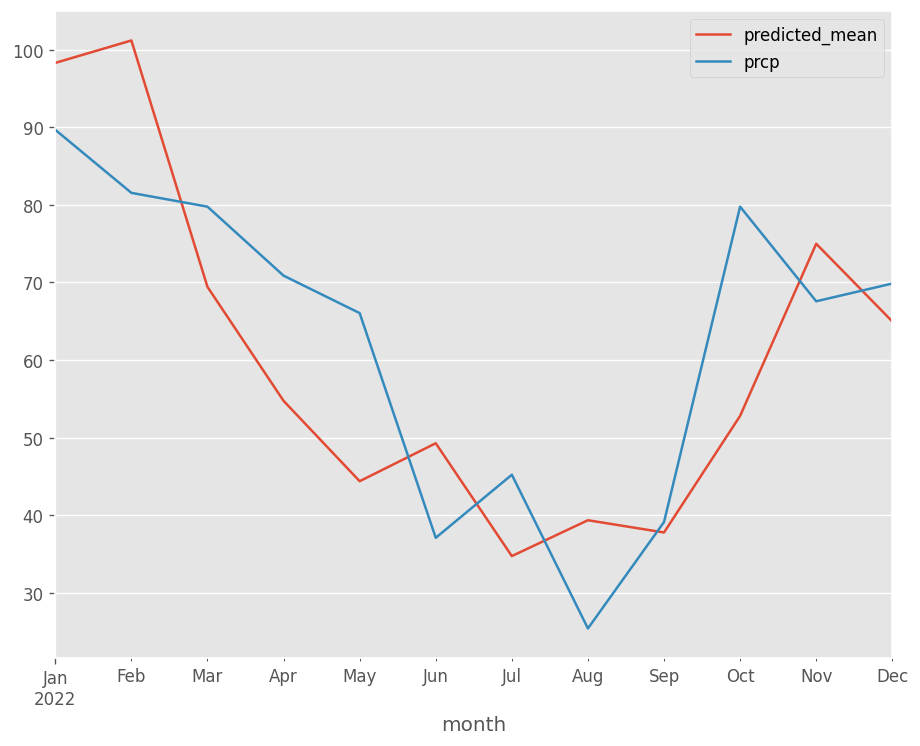

In [416]:
predict2.plot(legend = True)
test2['prcp'].plot(legend = True)

In [417]:
"""you can see, this model mostly can follow up the low and high trends. 
 Different from SARIMA model."""

'you can see, this model mostly can follow up the low and high trends. \n Different from SARIMA model.'

**Predict data**

In [418]:
df11.set_index('month', inplace=True)
df11.index.freq = 'MS'
df11

,prcp,temp(c)
month,,
2015-01-01,97.028,27.198925
2015-02-01,118.618,27.055556
2015-03-01,93.218,27.850000
2015-04-01,55.880,28.640741
2015-05-01,21.336,29.367384
...,...,...
2022-08-01,25.400,29.195341
2022-09-01,39.116,28.811111
2022-10-01,79.756,28.401852


In [419]:
model = SARIMAX(df11['prcp'], exogenous = df11['temp(c)'], order = (1, 0, 1), seasonal_order=(1, 0, 1, 12))
results4 = model.fit()
fore2 = results4.predict(len(df11), len(df11)+12, typ = 'levels').rename('SARIMAX forecast')

In [420]:
fore2

2023-01-01     96.146726
2023-02-01    100.134067
2023-03-01     84.778397
2023-04-01     64.548338
2023-05-01     39.978578
2023-06-01     31.171701
2023-07-01     26.256996
2023-08-01     20.585318
2023-09-01     31.875409
2023-10-01     45.629660
2023-11-01     54.684803
2023-12-01     62.415141
2024-01-01     89.788826
Freq: MS, Name: SARIMAX forecast, dtype: float64

In [421]:
df11 = df11.reset_index()

In [422]:
df11['month'] = pd.to_datetime(df11['month'])

Text(0, 0.5, 'Precitipation (mm)')

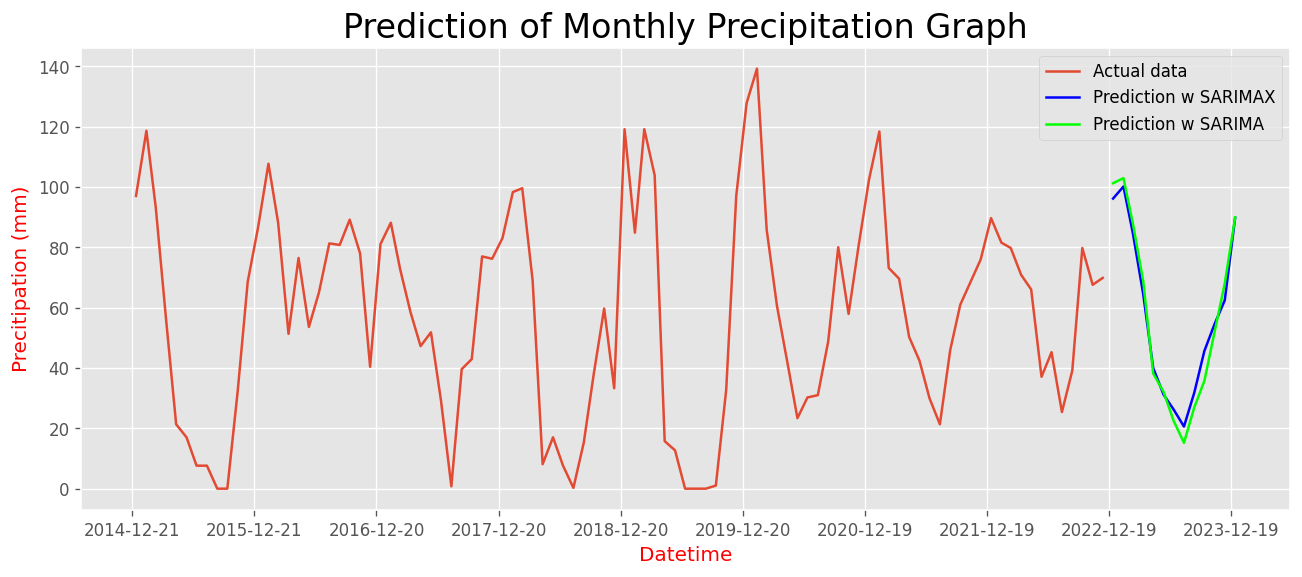

In [423]:
plt.figure(figsize= (13,5))
plt.style.use('ggplot')
plt.plot(df11['month'], df11['prcp'], linewidth=1.5, label='Actual data')
plt.plot(fore2, linewidth=1.5, label = 'Prediction w SARIMAX', color='b')
plt.plot(fore, linewidth=1.5, label = 'Prediction w SARIMA', color = 'lime')
plt.legend()
plt.title('Prediction of Monthly Precipitation Graph', fontsize = 20)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(365)) #mengubah interval xticks to 1 year interval
plt.xlabel('Datetime', color = 'r')
plt.ylabel('Precitipation (mm)', color = 'r')

We can see the difference of forecasting with SARIMA and SARIMAX. SARIMAX has lower RMSE and MAE, but greater MAPE. The chart made by SARIMAX model is much more notched than SARIMA. But, even SARIMAX model can't be 100% accurate.
